In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
#Import the data
df = pd.read_csv("real_estate.csv")

In [3]:
#Identify which states are necessary for Ralstate Co.
df["state"].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia',
       'Wyoming', 'Maine', 'Georgia', 'Pennsylvania', 'West Virginia',
       'Delaware'], dtype=object)

In [4]:
#Clear out Puerto Rico and Virgin Islands
df = df.loc[(df["state"] != 'Puerto Rico') & (df["state"] != 'Virgin Islands')]

In [5]:
#Convert acres to sqft
df["land_size_sqft"] = df["acre_lot"]*43560

In [6]:
#Rename column
df["house_size_sqft"] = df["house_size"]

In [7]:
#Drop unnecessary columns 
df = df.drop(columns = ["status","zip_code", "prev_sold_date","acre_lot","house_size", "city", "state"])

In [8]:
#Drop any rows that don't have necessary data available (nulls)
df = df.dropna(axis=0, how='any') 

In [9]:
#Summarize some basic statistics for each column
df.describe()

,bed,bath,price,land_size_sqft,house_size_sqft
count,397370.000000,397370.000000,3.973700e+05,3.973700e+05,397370.000000
mean,3.808370,2.701467,7.877203e+05,4.183134e+05,2412.277286
std,2.201272,2.258719,1.482577e+06,2.758363e+07,2440.396432
min,1.000000,1.000000,5.000000e+02,0.000000e+00,122.000000
25%,3.000000,2.000000,2.950000e+05,5.227200e+03,1344.000000
50%,3.000000,2.000000,4.690000e+05,1.176120e+04,1900.000000
75%,4.000000,3.000000,7.937560e+05,4.007520e+04,2784.000000
max,99.000000,198.000000,1.690000e+08,4.356000e+09,400149.000000


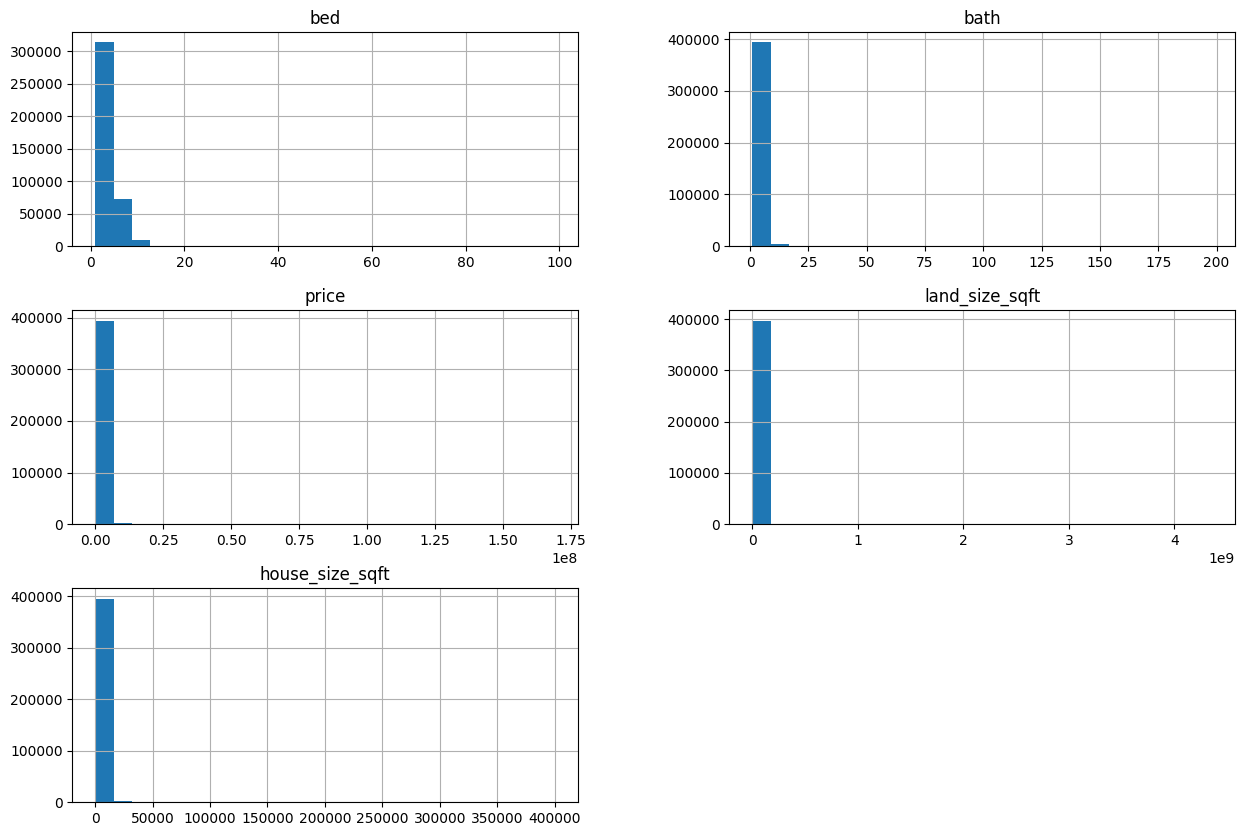

In [10]:
#Draw a rudimentary histograph for each column
df.hist(bins = 25, figsize=(15,10))
plt.show()

We can see by the ranges of the histograms (which are automatically calculated based on data points), there are some outliers. Cleaning those out of the dataset and redrawing, we got a more realistic picture:

In [11]:
#Drop rows that belong to outliers on each respective column
df = df.loc[(df["bed"] < 20) & (df["bath"] < 20) & (df["price"] < 2500000) & (df["land_size_sqft"] < 250000) & (df["house_size_sqft"] < 12500)]

array([[<Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'land_size_sqft'}>],
       [<Axes: title={'center': 'house_size_sqft'}>, <Axes: >]],
      dtype=object)

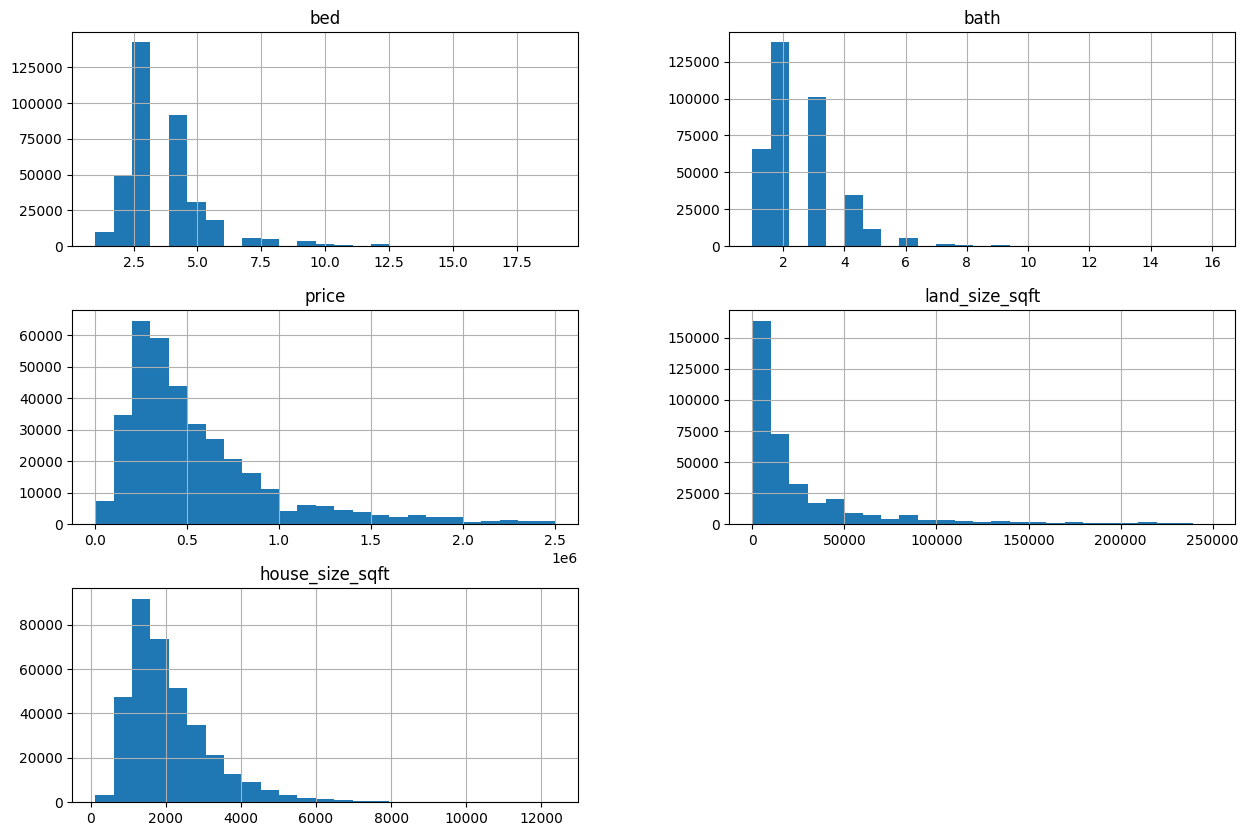

In [12]:
#Redraw the histograms
df.hist(bins = 25, figsize=(15,10))

<Axes: >

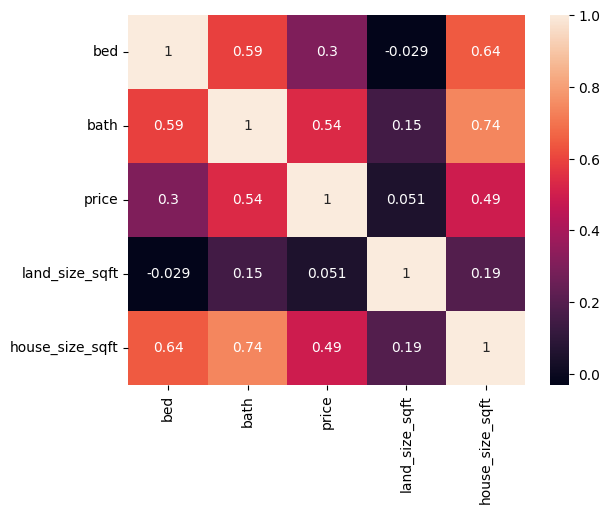

In [13]:
#Draw a correlation heatmap
sns.heatmap(df.corr(), annot = True)

Given the heatmap, we will only use the attributes that have a correlation attribute > .3. There is very little correlation between price and land_size_sqft, so that attribute will be eliminated from the training data

In [14]:
#Draw a column that does not have a strong correlation with price (label)
df = df.drop(columns = ["land_size_sqft"])

The model is ready to be created

In [15]:
#Export final training data as a csv
df.to_csv("train_data.csv")

In [16]:
#Create label and unlabeled data
x = df.drop(columns = ["price"])
y = df["price"]

In [17]:
#Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [18]:
#Create and fit the model with training data
lin_reg = LinearRegression()
model = lin_reg.fit(x_train.values, y_train)

In [19]:
#Create a dataframe with results and predicted values
results = pd.DataFrame({"predicted":model.predict(x_test.values), "real" : y_test})

In [20]:
#Calculate the mean absolute error based on test data
mean_absolute_error(results["real"], results["predicted"])

249805.58822866523

The model is not acceptable to make predictions as the MAE is too high, and results do not accurately reflect the real estate market.

Below, a user can enter a value for each attribute, and it will execute in the following two tabs of the notebook

In [22]:
beds = int(input("Please enter the number of bedrooms: "))
baths = int(input("Please enter the number of baths: "))
house_size = int(input("Please enter the size of livable space (in sqft): "))


Please enter the number of bedrooms:  3
Please enter the number of baths:  3
Please enter the size of livable space (in sqft):  1222


In [23]:
predict_value = round(model.predict([[beds,baths,house_size]])[0],2)

In [24]:
print(f"The price for the house should be: ${predict_value}")

The price for the house should be: $577115.36
